# Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv("data/SalesPrediction.csv")
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [3]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [4]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


## One hot encoding

In [5]:
df = pd.get_dummies(df)
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [6]:
df.isnull().sum()

TV                  10
Radio                4
Social Media         6
Sales                6
Influencer_Macro     0
Influencer_Mega      0
Influencer_Micro     0
Influencer_Nano      0
dtype: int64

## Handling missing values

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = df.fillna(df.mean())
df.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

In [9]:
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Influencer_Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


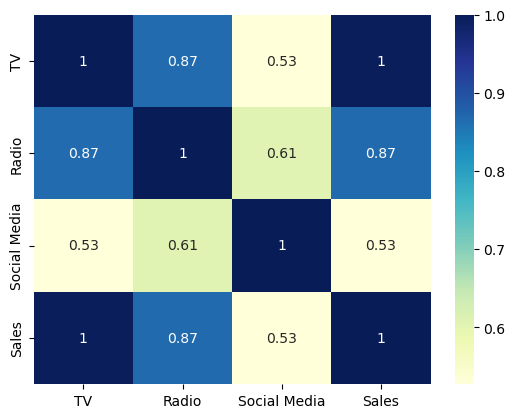

In [10]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

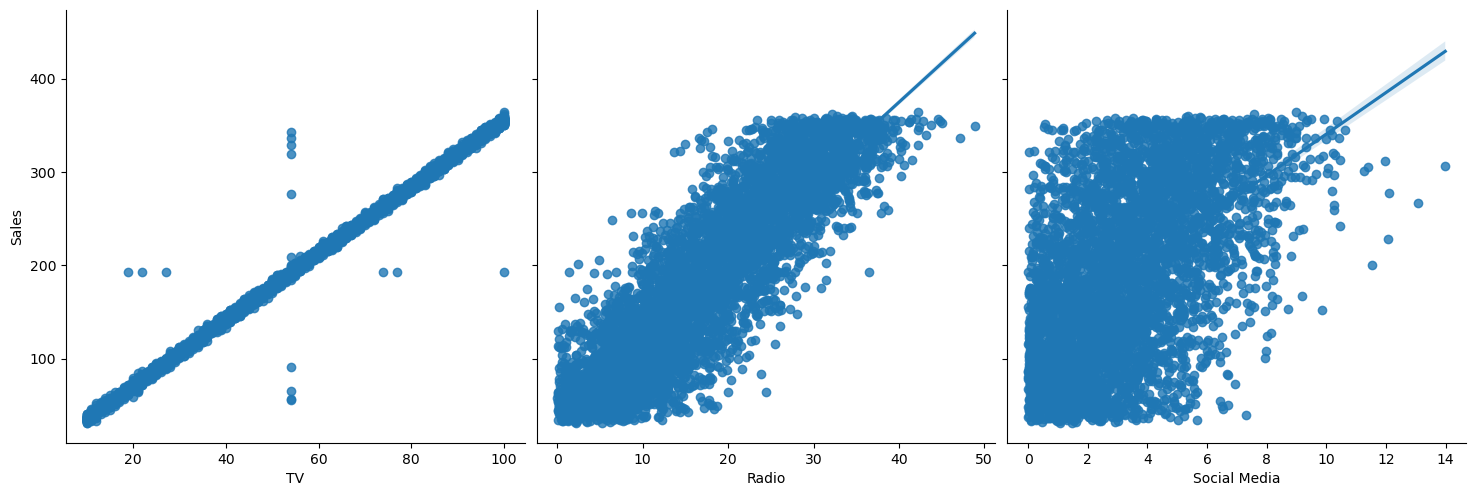

In [11]:
sns.pairplot(data=df,
             x_vars=['TV', 'Radio', 'Social Media'],
             y_vars=['Sales'],
             height=5,
             kind='reg')
plt.show()

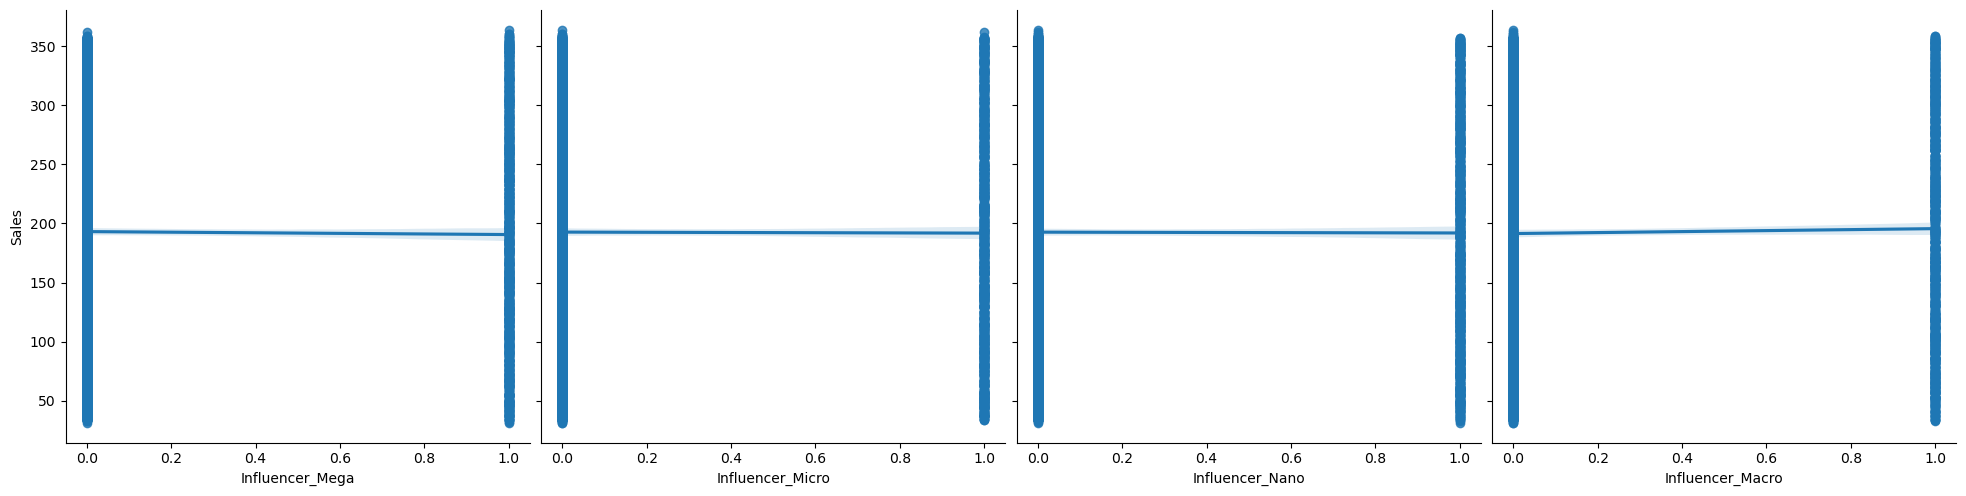

In [12]:
sns.pairplot(data=df,
             x_vars=['Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro'],
             y_vars=['Sales'],
             height=5,
             kind='reg')
plt.show()

## Train Test Split

In [13]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [14]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro']]
y = df[['Sales']]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
X_train.shape, y_train.shape

((3063, 7), (3063, 1))

In [17]:
X_test.shape, y_test.shape

((1509, 7), (1509, 1))

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [19]:
scaler.mean_[0]

54.173577723283785

In [20]:
scaler.scale_

array([26.0602579 ,  9.62806595,  2.21765947,  0.43381083,  0.43305981,
        0.43343598,  0.43173288])

In [22]:
X_test_processed = scaler.transform(X_test)

In [23]:
X_train_processed

array([[ 0.33869282, -0.3935435 , -0.17228084, ...,  1.73167391,
        -0.57848122, -0.57395739],
       [-0.19852366, -0.28899849, -1.47661593, ..., -0.57747593,
        -0.57848122, -0.57395739],
       [-0.42875929, -1.07436552, -0.55865556, ..., -0.57747593,
         1.72866459, -0.57395739],
       ...,
       [-1.61831007, -1.72922605,  0.58649299, ..., -0.57747593,
         1.72866459, -0.57395739],
       [-0.58224971, -0.91383556, -1.22645549, ...,  1.73167391,
        -0.57848122, -0.57395739],
       [-1.27295662, -1.45779228, -1.04859981, ...,  1.73167391,
        -0.57848122, -0.57395739]])

# I. Linear Regression  

In [24]:
from sklearn.metrics import r2_score
import numpy as np

class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples,  1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = self.X_data.shape[1]
        
        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []
        
    def compute_loss(self, y_pred, y_target):
        loss = (y_pred - y_target) ** 2
        loss = np.mean(loss)
        return loss
    
    def predict(self, X_data):
        if X_data.shape[1] == self.num_features:
            y_pred = X_data.dot(self.theta)
        else:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred
    
    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)
            
            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)
            
            # compute gradients
            loss_grd = 2 * (y_pred - self.y_target) / self.num_samples
            gradients = self.X_data.T.dot(loss_grd)
            
            # update weights
            self.theta = self.theta - self.learning_rate * gradients
            
            if (epoch % 50) == 0:
                print(f'Epoch: {epoch}, Loss: {loss}')
        
        return {
            'loss': sum(self.losses) / len(self.losses),
            'weight': self.theta
        }

In [25]:
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0, Loss: 46477.41254615649
Epoch: 50, Loss: 99.99013893101471
Epoch: 100, Loss: 68.42318472439051
Epoch: 150, Loss: 65.9715316927263
Epoch: 200, Loss: 65.78102257975665


{'loss': 574.9533068197113,
 'weight': array([[ 1.92950605e+02],
        [ 9.10242447e+01],
        [ 1.85079251e+00],
        [ 1.77885946e-01],
        [-1.21155194e-01],
        [-1.21620711e-01],
        [-1.37408975e-01],
        [-3.54147041e-01]])}

In [26]:
preds = linear_model.predict(X_test_processed)

In [27]:
preds[:5]

array([[160.68926102],
       [264.39740009],
       [299.39054122],
       [297.48093673],
       [ 74.14237477]])

In [28]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y - y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

In [29]:
# case 1
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
r2score(y_pred, y)

1.0

In [30]:
# case 2
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
r2score(y_pred, y)

-2.235294117647059

# II. Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed)

In [32]:
X_train_poly.shape

(3063, 36)

In [33]:
X_test_poly = poly_features.transform(X_test_processed)

In [34]:
X_test_poly.shape

(1509, 36)

In [35]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [36]:
linear_model = CustomLinearRegression(X_train_poly, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0, Loss: 44836.10700277076
Epoch: 50, Loss: 8.80880644524149e+24
Epoch: 100, Loss: 2.4165855601884274e+45
Epoch: 150, Loss: 6.629599374232948e+65
Epoch: 200, Loss: 1.818747433854686e+86


{'loss': 1.276822367328152e+104,
 'weight': array([[-1.55460909e+52],
        [-1.55460909e+52],
        [-1.41142128e+51],
        [-1.67945727e+51],
        [-2.73248022e+51],
        [ 9.85633603e+49],
        [-3.08433905e+50],
        [ 1.32151756e+50],
        [ 7.76710600e+49],
        [-2.00861952e+52],
        [-1.90228399e+52],
        [-1.40162363e+52],
        [ 3.42846453e+50],
        [-2.94452827e+50],
        [ 6.59644556e+50],
        [-7.11385476e+50],
        [-2.19423289e+52],
        [-1.60619774e+52],
        [ 2.49434513e+50],
        [-5.41258251e+50],
        [ 8.82624773e+50],
        [-5.93819786e+50],
        [-2.25426628e+52],
        [ 2.25828318e+50],
        [-4.66645409e+50],
        [ 5.87653690e+50],
        [-3.48807455e+50],
        [-1.54331196e+52],
        [ 5.32415165e+51],
        [ 5.07779552e+51],
        [ 5.06905816e+51],
        [-1.59020847e+52],
        [ 5.29542006e+51],
        [ 5.28487336e+51],
        [-1.53940922e+52],
        [ 5.

In [37]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

-5.807480732253731e+102

In [38]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

-5.807480732253731e+102

In [39]:
def create_polynomial_features(X, degree=2):
    """Create the polynomial features
    Args:
        X : an array tensor for the data
        degree : an intege for the degree of the generated polynomial features
    """
    X_mem = []
    for x_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
    for d in range(2, degree + 1):
        X_new = np.c_[X_new, np.power(X_sub, d)]
    X_mem.extend(X_new.T)
    return np.c_[X_mem].T

# III. Sales Prediction

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train_processed)
X_test_poly = poly_features.transform(X_test_processed)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9951531072783605